In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

# ---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
df = pd.read_csv('client_data.csv')
df1 = pd.read_csv('price_data.csv')
df_client = df.copy(deep = True)
df_price = df1.copy(deep = True)

In [4]:
df_client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
df_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0



## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
df1.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


# client_data.csv 
- id = client company identifier
- activity_new = category of the company’s activity 
- channel_sales = code of the sales channel 
- cons_12m = electricity consumption of the past 12 months 
- cons_gas_12m = gas consumption of the past 12 months 
- cons_last_month = electricity consumption of the last month 
- date_activ = date of activation of the contract 
- date_end = registered date of the end of the contract 
- date_modif_prod = date of the last modification of the product 
- date_renewal = date of the next contract renewal 
- forecast_cons_12m = forecasted electricity consumption for next 12 months 
- forecast_cons_year = forecasted electricity consumption for the next calendar year 
- forecast_discount_energy = forecasted value of current discount
- forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months 
- forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak) 
- forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
- forecast_price_pow_off_peak = forecasted power price for 1st period (off peak) 
- has_gas = indicated if client is also a gas client
- imp_cons = current paid consumption 
- margin_gross_pow_ele = gross margin on power subscription 
- margin_net_pow_ele = net margin on power subscription 
- nb_prod_act = number of active products and services 
- net_margin = total net margin 
- num_years_antig = antiquity of the client (in number of years) 
- origin_up = code of the electricity campaign the customer first subscribed to 
- pow_max = subscribed power 
- churn = has the client churned over the next 3 months

# price_data.csv 
- id = client company identifier 
- price_date = reference date 
- price_off_peak_var = price of energy for the 1st period (off peak) 
- price_peak_var = price of energy for the 2nd period (peak) 
- price_mid_peak_var = price of energy for the 3rd period (mid peak)
- price_off_peak_fix = price of power for the 1st period (off peak) 
- price_peak_fix = price of power for the 2nd period (peak) 
- price_mid_peak_fix = price of power for the 3rd period (mid peak) 
Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


# Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [9]:
df_client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
df_price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [11]:
num_client = df_client.select_dtypes(include = 'number')
cat_client = df_client.select_dtypes(include = 'object')
num_price = df_price.select_dtypes(include = 'number')
cat_price = df_price.select_dtypes(include = 'object')

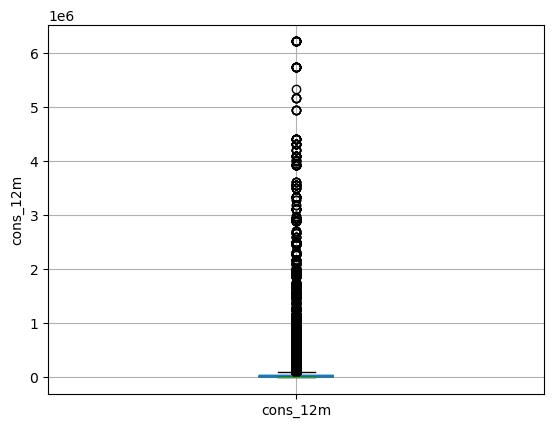

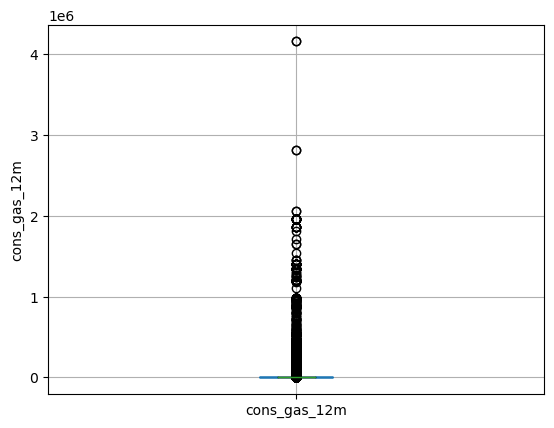

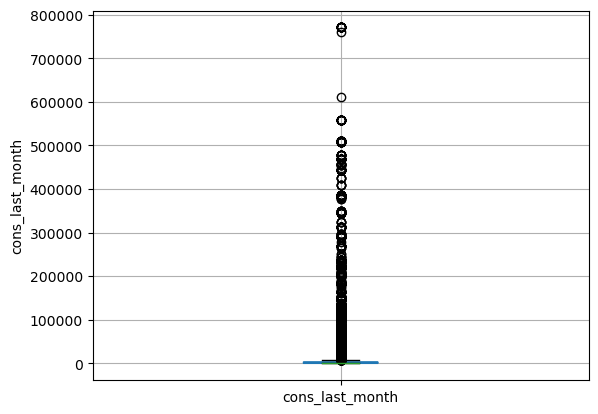

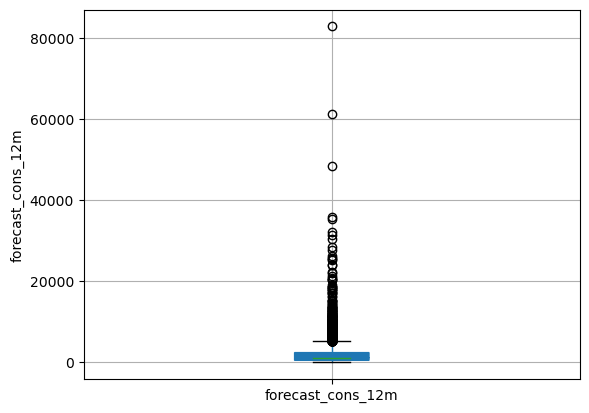

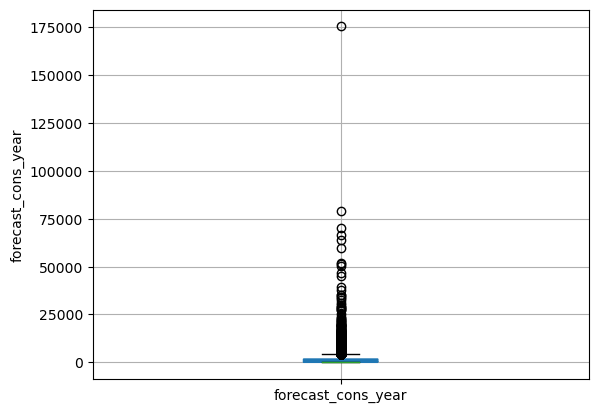

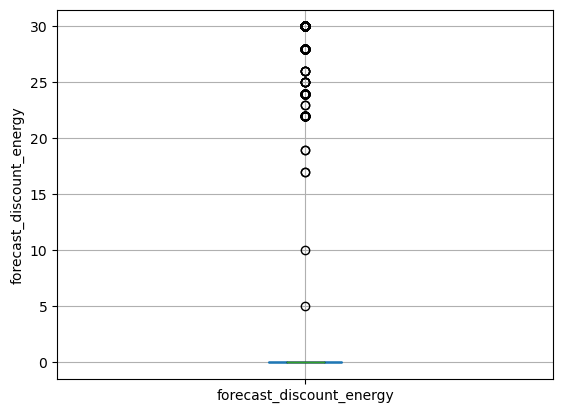

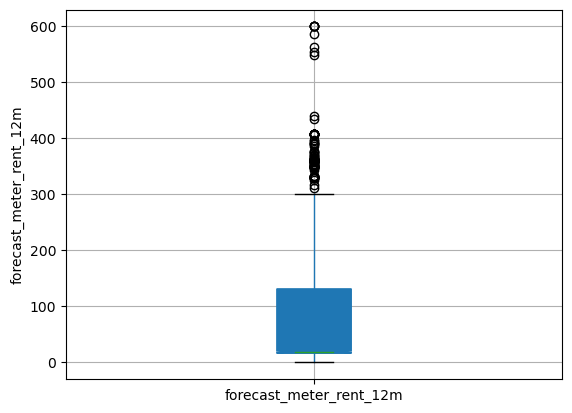

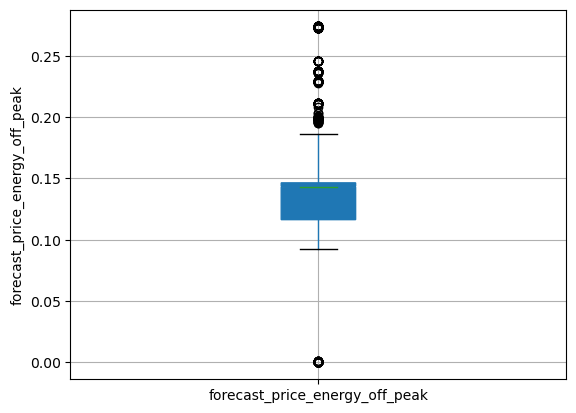

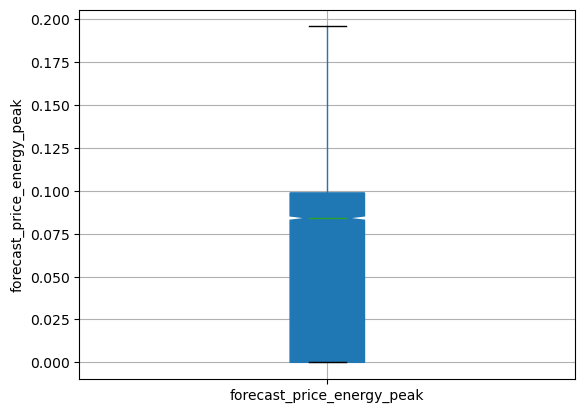

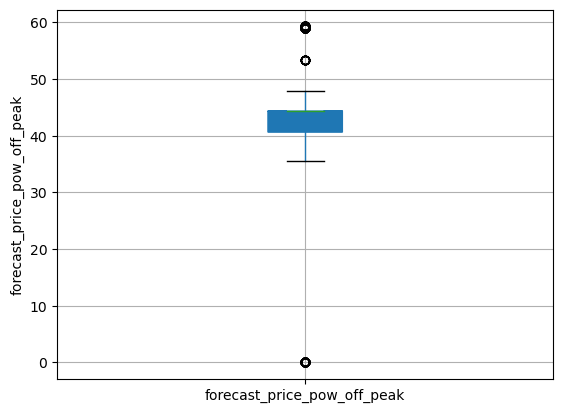

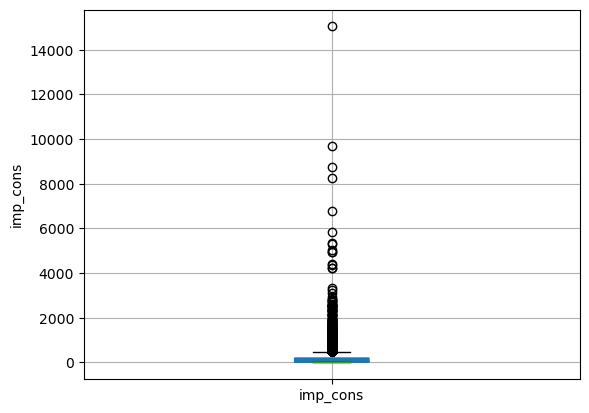

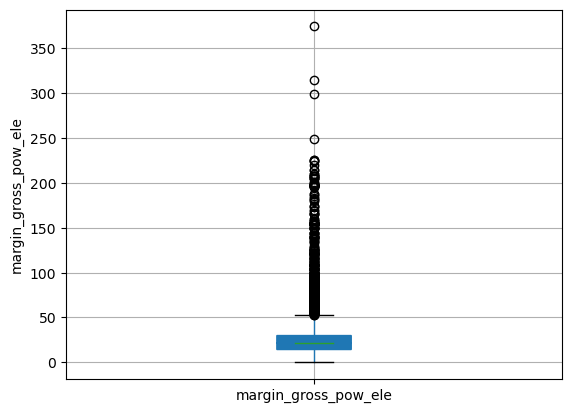

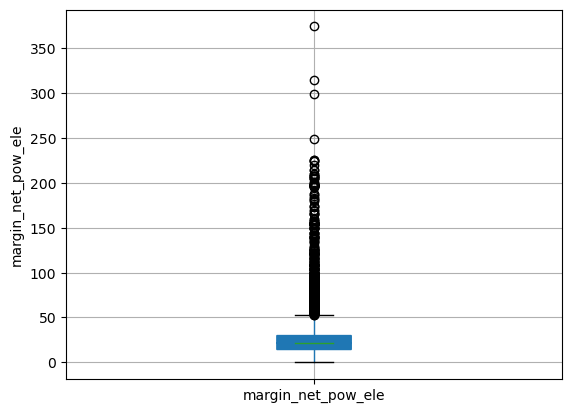

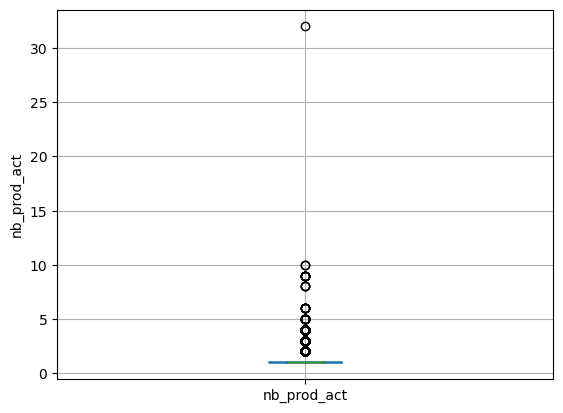

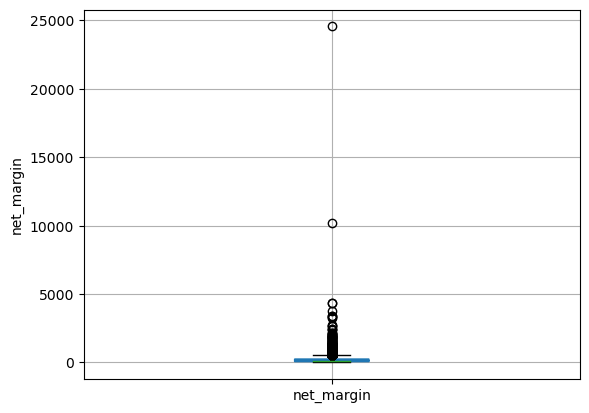

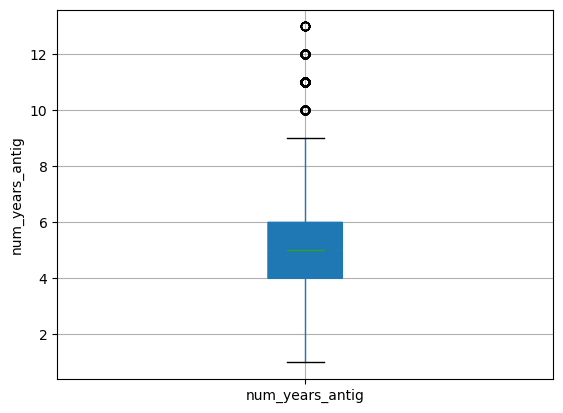

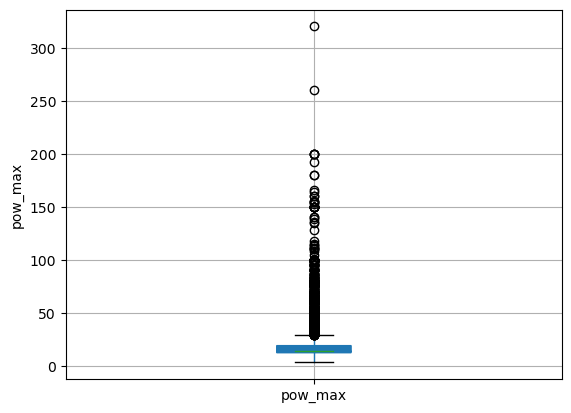

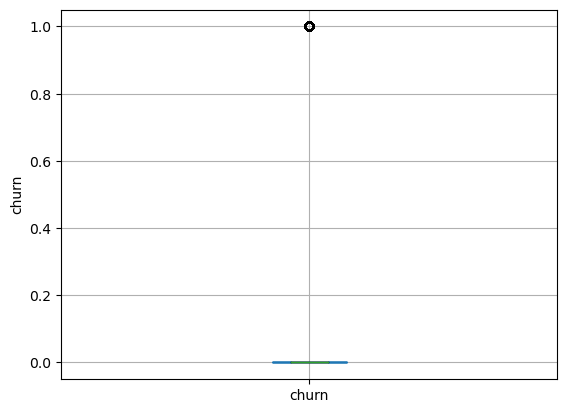

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in num_client:
  num_client.boxplot(column = i, patch_artist = True, notch = True)
  plt.ylabel(i)
  plt.show()

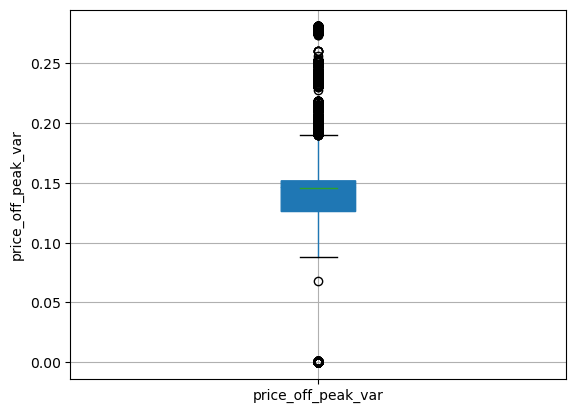

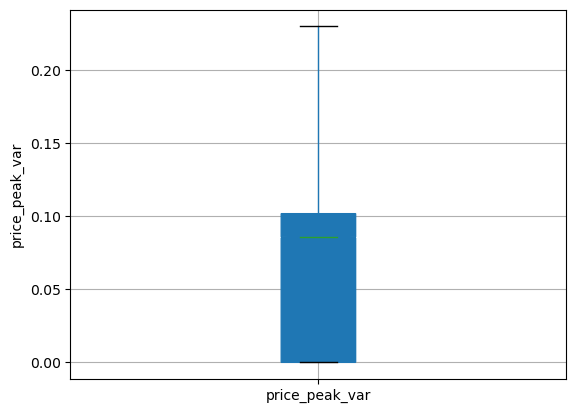

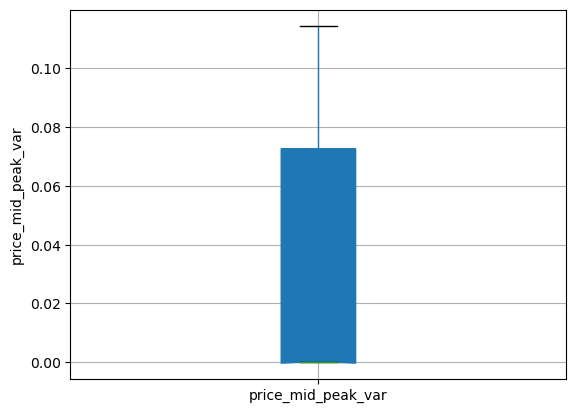

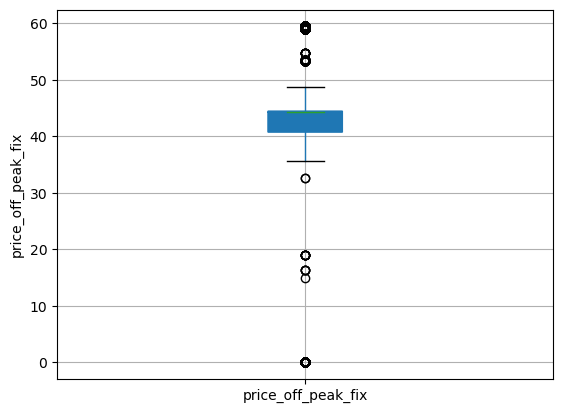

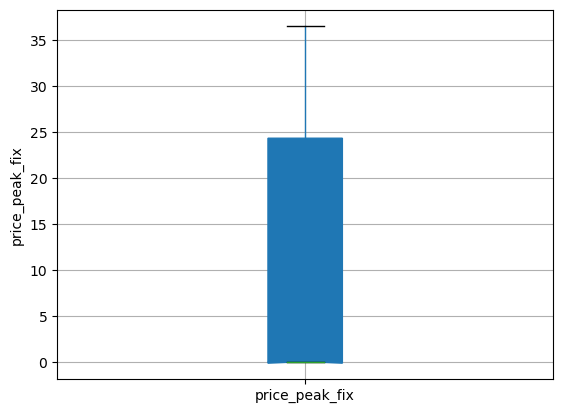

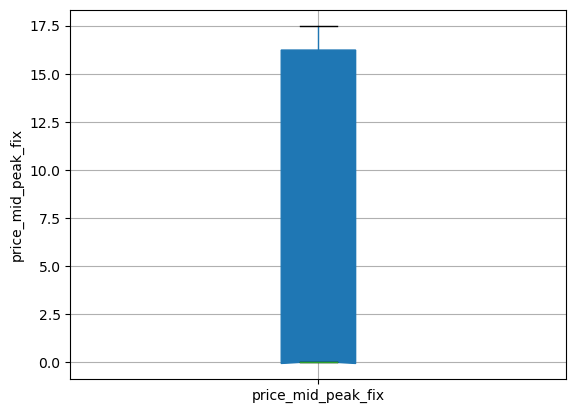

In [14]:
for i in num_price:
  num_price.boxplot(column = i, patch_artist = True, notch = True)
  plt.ylabel(i)
  plt.show()

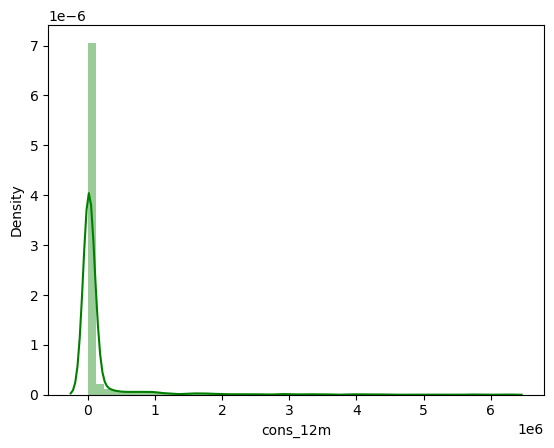

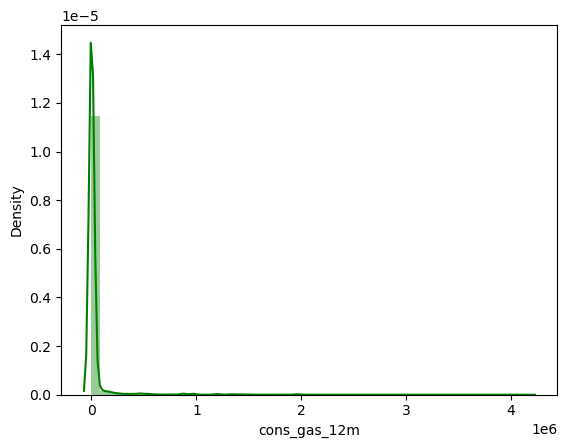

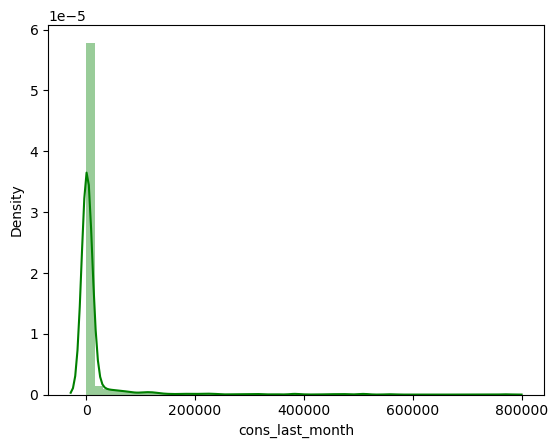

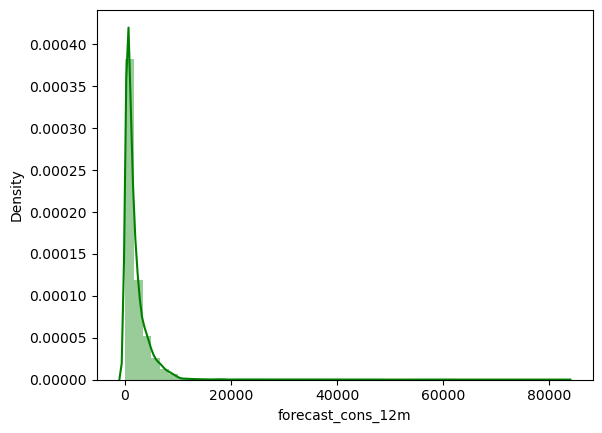

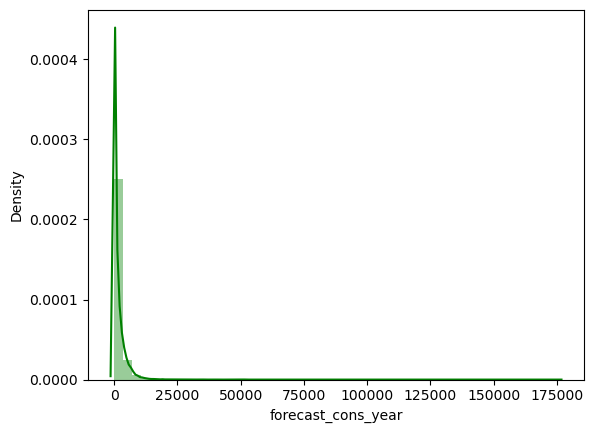

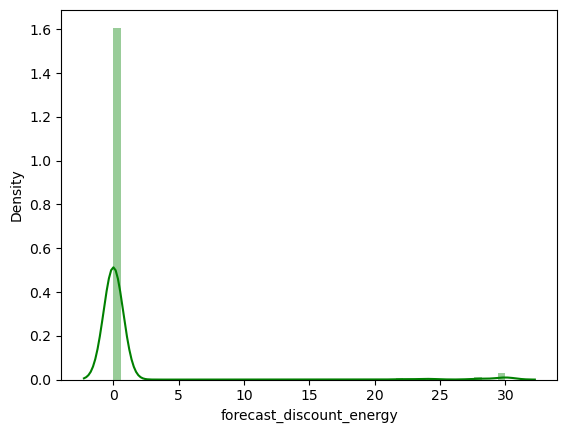

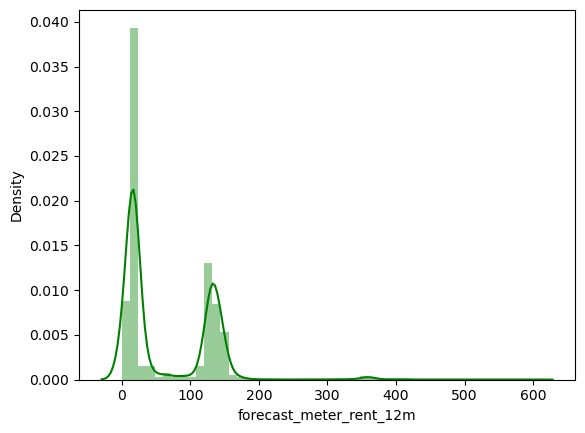

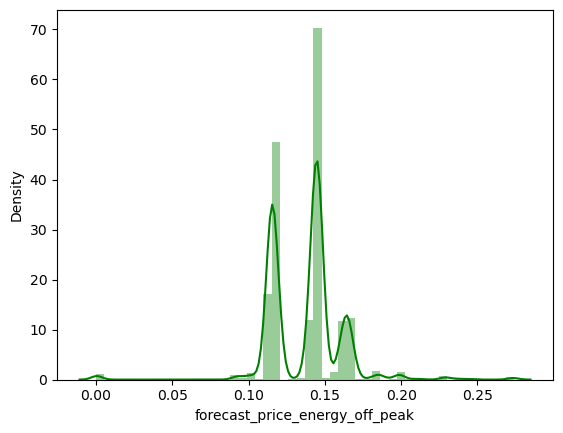

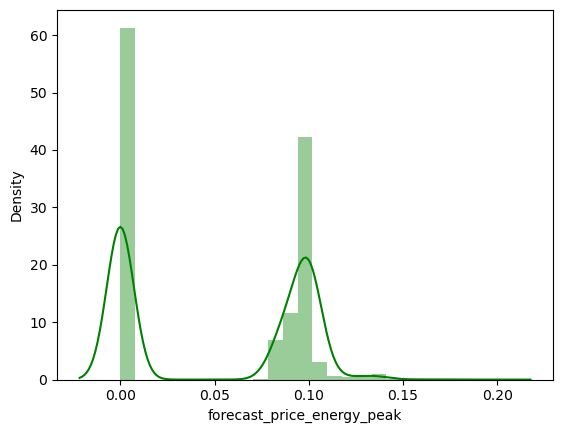

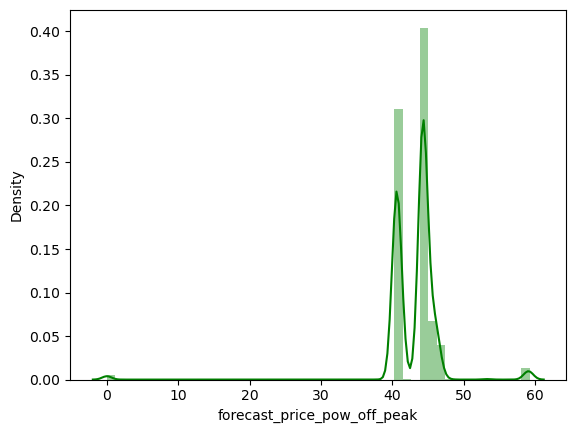

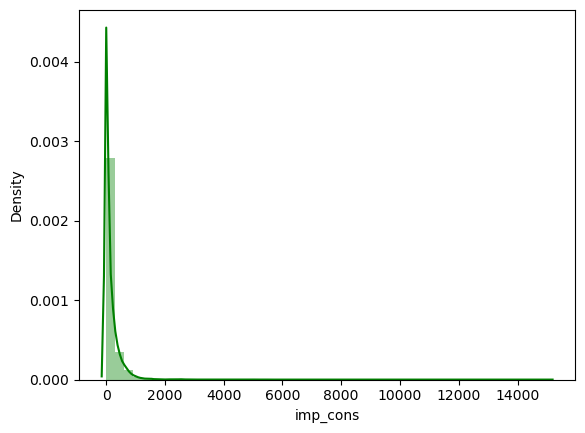

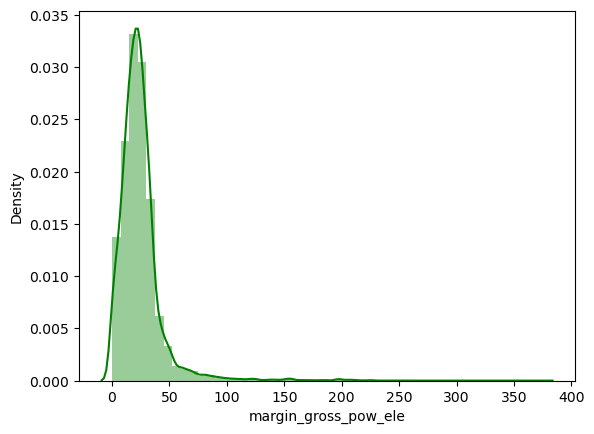

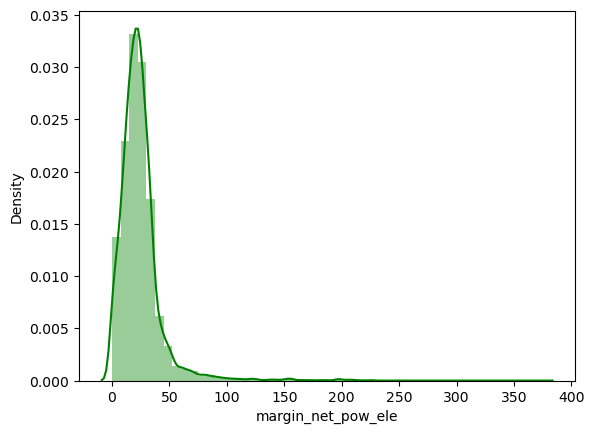

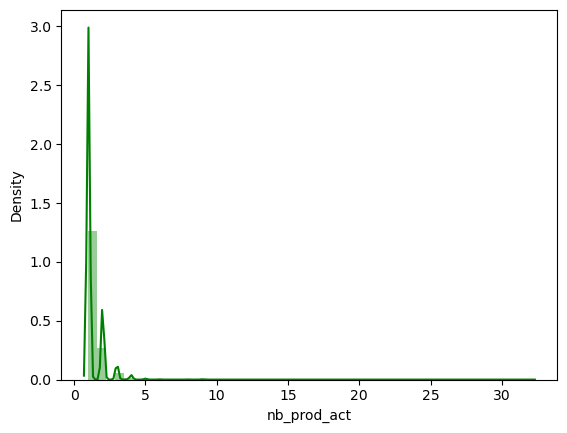

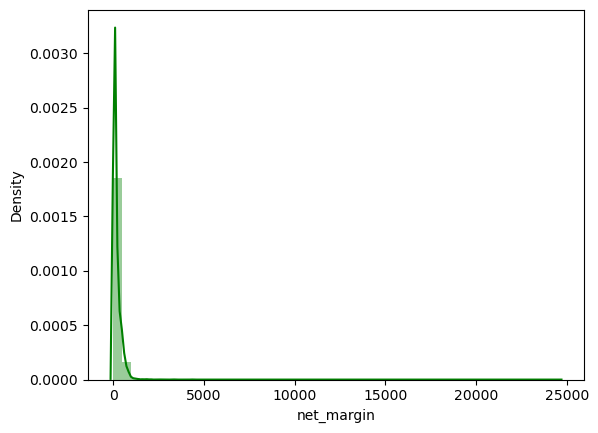

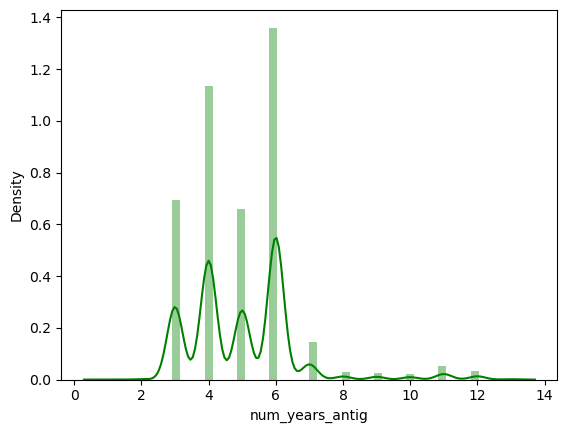

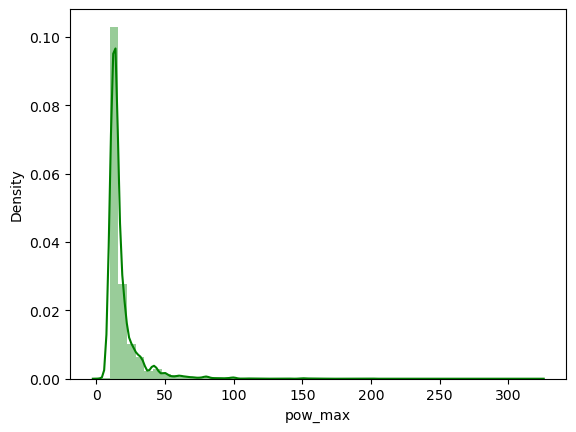

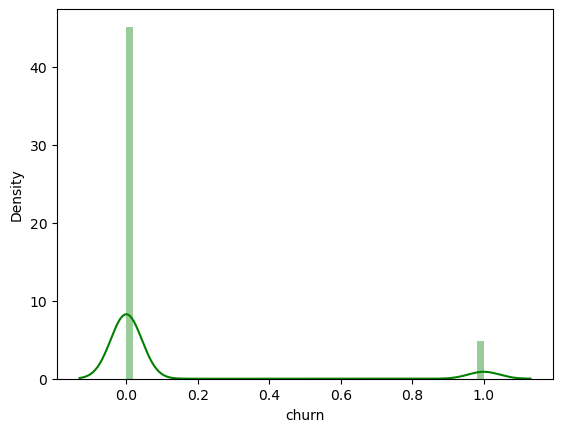

In [15]:
for i in num_client:
  sns.distplot(df_client[i], kde = True, color = 'green')
  plt.show()

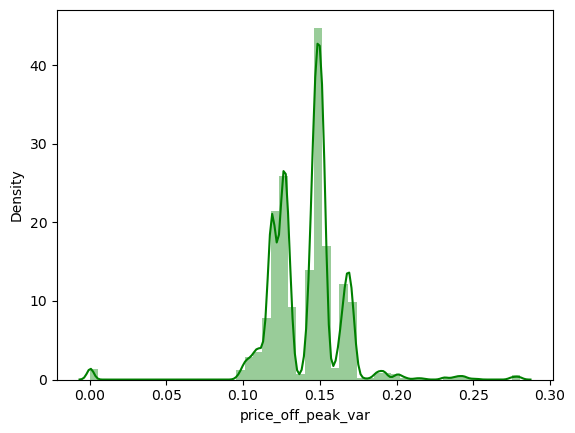

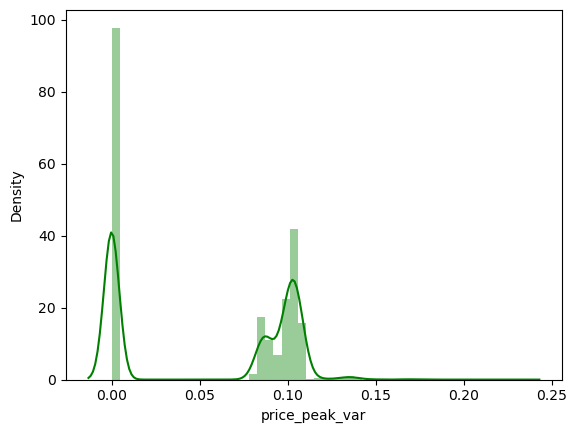

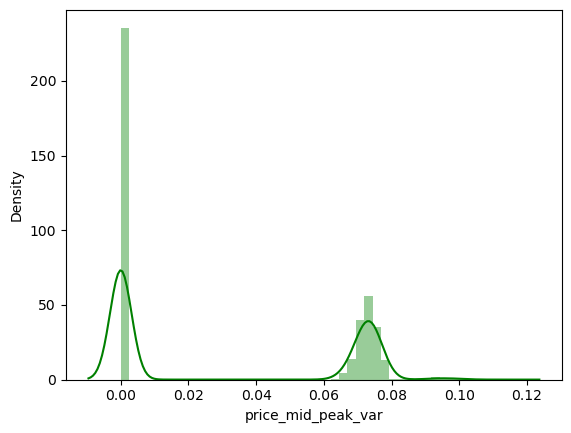

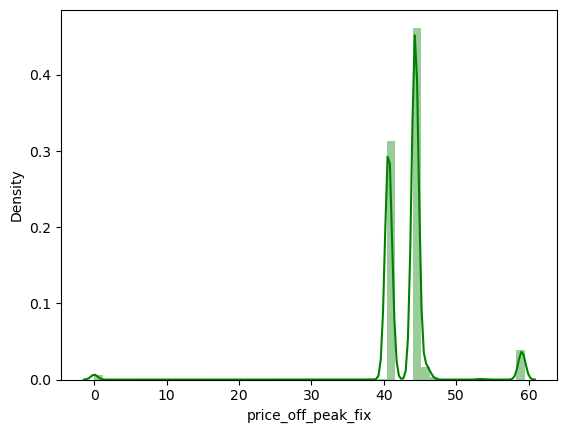

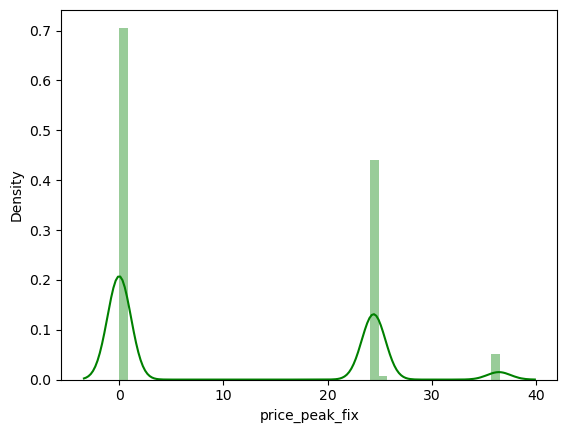

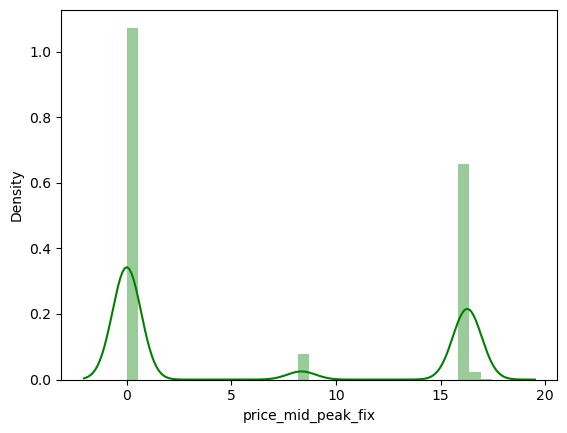

In [16]:
for i in num_price:
  sns.distplot(df_price[i], kde = True, color = 'green')
  plt.show()

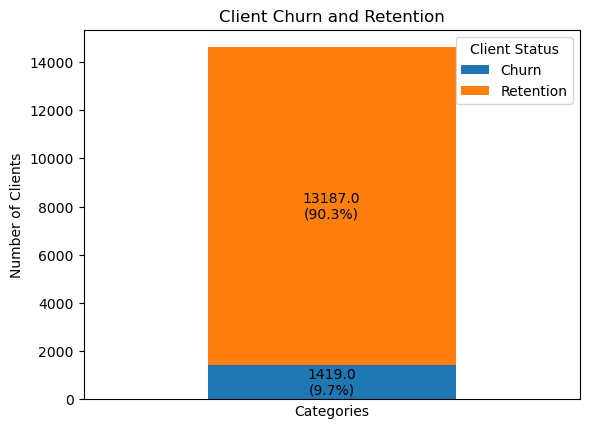

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_client is your DataFrame and it's already been loaded.

# Group by 'churn' and count the unique 'ID's in each group
churn_counts = df_client.groupby('churn')['id'].nunique()

# Calculate the total number of clients
total_clients = churn_counts.sum()

# Create a DataFrame from the grouped data
churn_df = pd.DataFrame({'Churn': churn_counts[1], 'Retention': churn_counts[0]}, index=[0])

# Plotting the stacked bar chart
ax = churn_df.plot(kind='bar', stacked=True)
plt.title('Client Churn and Retention')
plt.xlabel('Categories')
plt.ylabel('Number of Clients')
plt.xticks([])  # Hides the x-axis labels
plt.legend(title='Client Status')

# Annotate the total values and percentages on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            f'{height}\n({height/total_clients:.1%})', 
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()


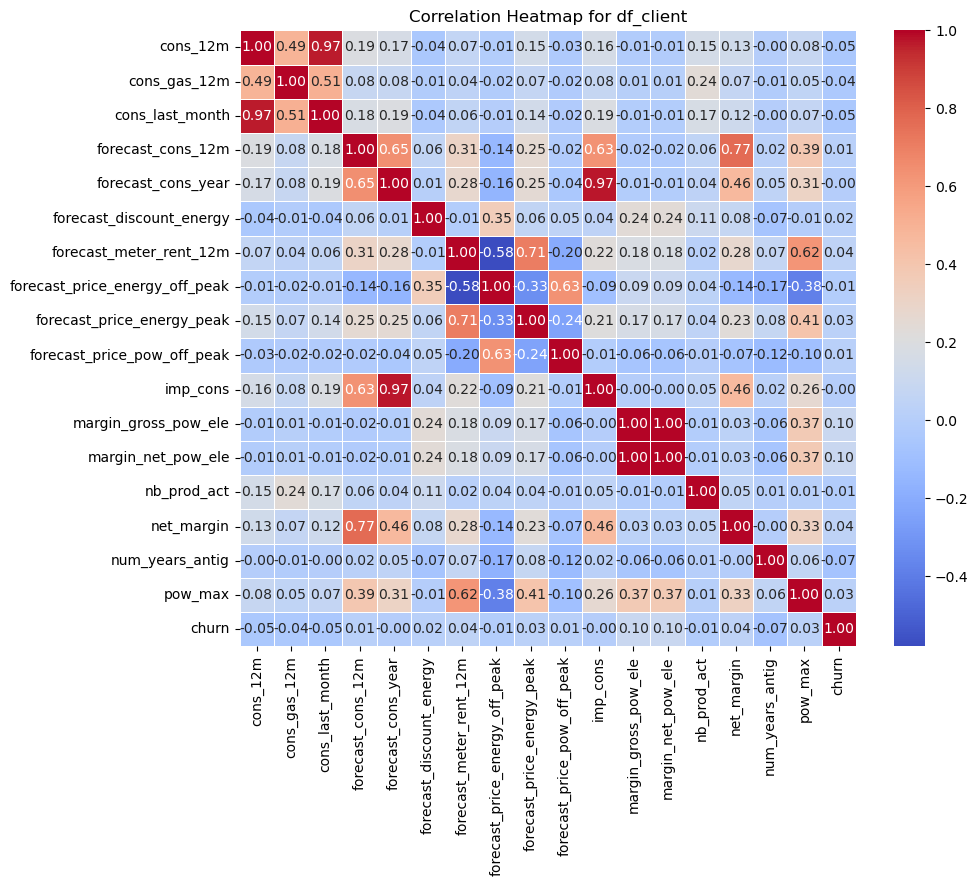

In [22]:
# Calculate the correlation matrix
corr = df_client.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap for df_client')
plt.show()

# Here are the insights from the heatmap analysis presented in a structured manner:

Consumption Correlation:

There is a high correlation between consumption in the last month (cons_last_month) and consumption over the past 12 months (cons_12m). This suggests that clients’ monthly consumption patterns are consistent with their annual consumption trends.

Forecasting Correlation:

A strong relationship exists between the forecasted consumption for the year (forecast_cons_year) and the forecasted consumption over the past 12 months (forecast_cons_12m). This indicates that the forecasts are aligned and possibly based on similar underlying factors or models.

Immediate Consumption vs. Forecast:
There is a significant correlation between immediate consumption (imp_cons) and the forecasted consumption for the year (forecast_cons_year). This could imply that recent consumption is a good predictor of the expected annual consumption.

Financial Implications:
The forecasted consumption over the past 12 months (forecast_cons_12m) shows a high correlation with net margin. This relationship may suggest that accurate consumption forecasting is crucial for financial planning and profitability.

# Refined Findings:
Data Analysis: Conducted an in-depth analysis of consumption patterns, forecasting accuracy, profit margins, and power usage from client data.

Data Skewness: Identified a significant positive skew in most data categories, necessitating normalization or transformation prior to any predictive modeling efforts.

Customer Churn: The analysis revealed that approximately 9.7% of customers have churned, indicating a need for strategic interventions.

## Refined Suggestions:

Competitive Offers: Investigate instances of customer churn, which may be attributed to competitors offering more attractive deals at similar price points.

Customer Feedback: Implement a feedback solicitation process to gather customer insights, addressing any concerns or suggestions they may have.

Loyalty Incentives: Introduce loyalty programs or exclusive benefits for long-term subscribers to enhance customer retention and reduce churn rates.